In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
def fix_indexes(ar):
    ind = np.zeros((len(ar), 3),  dtype=np.int16 )
    for i in range(len(ar)):
        ind[i,0] = int(ar[i][0][0:5])
        ind[i,1] = int(ar[i][0][6:11])
        ind[i,2] = int(ar[i][0][12:])
    return ind

In [3]:
train_indexes = pd.read_csv('train.csv',header=None).to_numpy()
test_indexes = pd.read_csv('test.csv',header=None).to_numpy()

train_indexes = fix_indexes(train_indexes)
test_indexes = fix_indexes(test_indexes)

for i in range(30000):
    temp = train_indexes[i,2]
    train_indexes[i,2] = train_indexes[i,1]
    train_indexes[i,1] = temp

y = np.zeros(len(train_indexes))
y[30000:] = 1

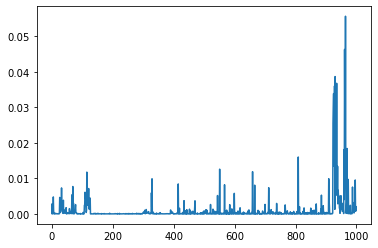

In [4]:
Xtotal = pd.read_csv("feat1.csv", header = None).to_numpy()[1:,1:]
plt.plot(np.mean(Xtotal, axis = 0))

In [5]:
max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=30, strides=30, padding='valid')

In [6]:
features = np.zeros((10000, 33))
for i in range(10000):
    x = max_pool_1d(np.reshape(Xtotal[i], (1, 1000, 1))).numpy()
    x = np.reshape(x, 33)
    features[i] = x
    if i % 1000 == 0:
        print("{:3.0f}%".format(i/100))
print("{:3.0f}%".format(100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

  0%
 10%
 20%
 30%
 40%
 50%
 60%
 70%
 80%
 90%
100%


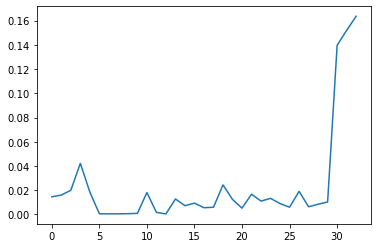

In [7]:
plt.plot(np.mean(features, axis = 0))

In [8]:
X = np.zeros((len(train_indexes), 99))
for i in range(len(train_indexes)):
    X[i, 0:33] = features[train_indexes[i, 0]]
    X[i, 33:66] = features[train_indexes[i, 1]]
    X[i, 66:99] = features[train_indexes[i, 2]]

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [11]:
clf = HistGradientBoostingClassifier( l2_regularization = 2*1e-4, max_iter = 100).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8101959202876634
0.6286712816721554


In [12]:
clf = HistGradientBoostingClassifier( l2_regularization = 2*1e-4, max_iter = 300).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9257653661323386
0.6790442906109282


In [13]:
clf = HistGradientBoostingClassifier( l2_regularization = 2*1e-4, max_iter = 500).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9617232919985214
0.7034746958800995


In [14]:
clf = HistGradientBoostingClassifier( l2_regularization = 2*1e-4, max_iter = 1000).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9680747387169405
0.7125142818737819
